# Рынок заведений общественного питания Москвы

Описание данных:

<br> object_name — название объекта общественного питания;
<br> chain — сетевой ресторан;
<br> object_type — тип объекта общественного питания;
<br> address — адрес;
<br> number — количество посадочных мест.

In [35]:
# загрузим библиотеки:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

#### Шаг №1. Загрузим данные и подготовьте их к анализу

In [36]:
rest_data = pd.read_csv('rest_data.csv')
rest_data.sample(10)

,id,object_name,chain,object_type,address,number
1984,26492,То Да Сё,да,ресторан,"город Москва, Баррикадная улица, дом 2/1, стро...",200
7195,150897,Школа,нет,столовая,"город Москва, Зоологическая улица, дом 28, стр...",140
14626,219486,Бургерная ФАРШ,нет,ресторан,"город Москва, улица Вавилова, дом 3",36
11357,189638,ЛАНЧ БОКС,нет,ресторан,"город Москва, Брянская улица, дом 5",48
4913,22789,Кружка,да,кафе,"город Москва, Митинская улица, дом 25, корпус 4",84
641,24514,ЗОЛОТЫЕ РУЧКИ,нет,кафе,"город Москва, Люблинская улица, дом 121/1",40
6162,91156,Макдоналдс,да,ресторан,"город Москва, Профсоюзная улица, дом 129А",120
874,27873,Буфет при ВУЗе,нет,буфет,"город Москва, Большая Переяславская улица, дом...",30
8388,157428,Мини-кофейня,нет,кафе,"город Москва, Краснопресненская набережная, до...",0
13494,200021,Мята Lounge,да,кафе,"город Москва, улица Космонавта Волкова, дом 6А",8


In [37]:
#проверим, есть ли дубликаты
rest_data[rest_data[['object_name','chain','address','number','object_type']].duplicated()].count()

id             82
object_name    82
chain          82
object_type    82
address        82
number         82
dtype: int64

In [38]:
#избавимся от дубликатов
rest_data = rest_data[['object_name','chain','address','number','object_type']].drop_duplicates().reset_index(drop = True)

In [39]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15284 entries, 0 to 15283
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15284 non-null  object
 1   chain        15284 non-null  object
 2   address      15284 non-null  object
 3   number       15284 non-null  int64 
 4   object_type  15284 non-null  object
dtypes: int64(1), object(4)
memory usage: 597.2+ KB


In [40]:
print(rest_data['object_type'].unique())
print(rest_data['chain'].unique())

['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']
['нет' 'да']


In [41]:
# для удобства заменим данные из колонки chain на True и False
rest_data['chain'].replace({'да':True,'нет':False},inplace = True)

In [42]:
rest_data.query('chain == True')['object_name'].unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

Похоже среди сетевых заведени очень много проблем с названиями - некоторые названия большими буквами, у многих в начале приписка - кафе, бар, ресторан и прочее. Нужно избавиться от этого.

In [43]:
#приведем названия к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].apply(lambda x: x.lower())

In [44]:
object_type_dict = rest_data['object_type'].unique()
add_to_dict = np.array(['«','»','-','ресторан японской кухни','японский ресторан','кофейня','кафе-закусочная','ресторан быстрого питания','семейное кафе и кондитерская','кафе мороженного','семейное кафе','закусочная','пиццерия','кальянная','предприятие быстрого питания','кальян-бар','анти-кафе кальянная','японский ресторан'])
object_type_dict = np.append(object_type_dict,add_to_dict)
object_type_dict

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)', '«', '»', '-',
       'ресторан японской кухни', 'японский ресторан', 'кофейня',
       'кафе-закусочная', 'ресторан быстрого питания',
       'семейное кафе и кондитерская', 'кафе мороженного',
       'семейное кафе', 'закусочная', 'пиццерия', 'кальянная',
       'предприятие быстрого питания', 'кальян-бар',
       'анти-кафе кальянная', 'японский ресторан'], dtype=object)

In [45]:
#напишем функцию, которая очистит названия от лишних элементов
def cleaner(text):
    global object_type_dict
    for d in object_type_dict:
        while d in text:
            text = text.replace(d,'')
    return text.strip()

In [46]:
#применим функцию
rest_data['new_name'] = rest_data['object_name'].apply(cleaner)

In [47]:
rest_data.query('chain == True')['new_name'].unique()
# не идеально, но лучше чем было

array(['пиццетория', 'брусника', 'алло пицца', 'суши wok', 'тануки',
       "домино'с пицца", 'готика', 'муму', 'хлеб насущный', 'tajj mahal',
       'данкин донатс', 'вареничная №1', 'шоколадница', 'теремок',
       'хинкальная', 'шантимель', 'хинкальная city', 'кружка', 'суши вок',
       'примавера', 'виктория', 'академия', 'чебуречная ссср',
       'макдоналдс', 'grand cru', 'чайхона №1', 'панчо пицца', 'kfc',
       'сабвей', 'якитория', 'советские времена', 'андерсон', 'subway',
       'суши сет', 'шоколад', 'тирольские пироги', 'гамбринус',
       'пицца фабрика', 'сити пицца', 'кофе хаус',
       'кулинарная лавка братьев караваевых братья караваевы', 'прайм',
       'пицца экспресс', 'шоколадница кофе хаус', 'николай', 'магнолия',
       'кофе с собой', 'джаганнат', 'волконский', 'moskalyan',
       'гинонотаки', 'тратория semplice', 'ньокки', 'хижина',
       'додо пицца', 'крошка картошка', 'бургер кинг', 'папа джонс',
       'кондитерская волконский', 'две палочки', 'джон д

In [48]:
rest_data.query('new_name == ""')
# 787 no-name заведений от которых придётся избавиться (5%)

,object_name,chain,address,number,object_type,new_name
20,кафе,False,"город Москва, Алтайская улица, дом 33/7",30,кафе,
61,столовая,False,"город Москва, Бабаевская улица, дом 3",90,столовая,
173,буфет,False,"город Москва, проспект Вернадского, дом 86, ст...",40,буфет,
238,кафе,False,"город Москва, улица Бориса Галушкина, дом 26",45,столовая,
245,буфет,False,"город Москва, улица Героев Панфиловцев, дом 51",20,буфет,
...,...,...,...,...,...,...
14927,кафе,False,"город Москва, Береговой проезд, дом 5А, корпус 1",2,кафе,
14928,кофейня,False,"город Москва, Береговой проезд, дом 5А, корпус 1",4,кафе,
14931,закусочная,False,"город Москва, поселение Сосенское, посёлок Ком...",0,закусочная,
14934,кафе,False,"город Москва, Люблинская улица, владение 60, с...",20,кафе,


In [49]:
rest_data = rest_data.query('new_name != ""').reset_index(drop=True)
rest_data.sample(5)

,object_name,chain,address,number,object_type,new_name
6927,гбоу сош 556,False,"город Москва, Днепропетровская улица, дом 33А",240,столовая,гбоу сош 556
9459,буфет «булгаковский дом»,False,"город Москва, Большая Садовая улица, дом 10",4,буфет,булгаковский дом
4653,столовая гбоу сош № 1538,False,"город Москва, Новотушинский проезд, дом 8, кор...",240,столовая,гбоу сош № 1538
5371,соки,False,"город Москва, Большая Семёновская улица, дом 16",0,кафетерий,соки
818,кафе «americano»,False,"город Москва, Малый Козихинский переулок, дом ...",30,ресторан,americano


Данные пришлось немного обработать, в целом теперь с ними можно работать

##### Шаг №2. Анализ данных

In [50]:
# Исследуем соотношение видов объектов общественного питания по количеству.

object_types = rest_data.groupby('object_type',as_index=False).object_name.count().sort_values(by='object_name')
fig = px.bar(object_types, x='object_type', y='object_name',title='Виды объектов общественного питания')
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.update_xaxes(tickangle=45)
fig.show()


Похоже с большим отрывом лидирует кафе - 5768 мест, следующий ресторан и столовая с 2268 и 2264 мест соответственно

3.8842780026990553


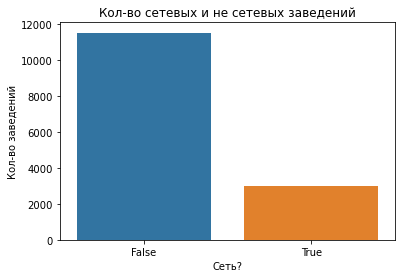

In [51]:
# Исследуем соотношение сетевых и несетевых заведений по количеству.
chain = rest_data.groupby('chain',as_index=False).object_name.count()

print(chain.loc[0,'object_name']/chain.loc[1,'object_name'])
ax=sns.barplot(data=chain,x='chain',y='object_name')
ax.set_title('Кол-во сетевых и не сетевых заведений')
ax.set_xlabel('Сеть?')
ax.set_ylabel('Кол-во заведений')
plt.show()

Количество сетевых заведений почти в 4 раза меньше не сетевых.

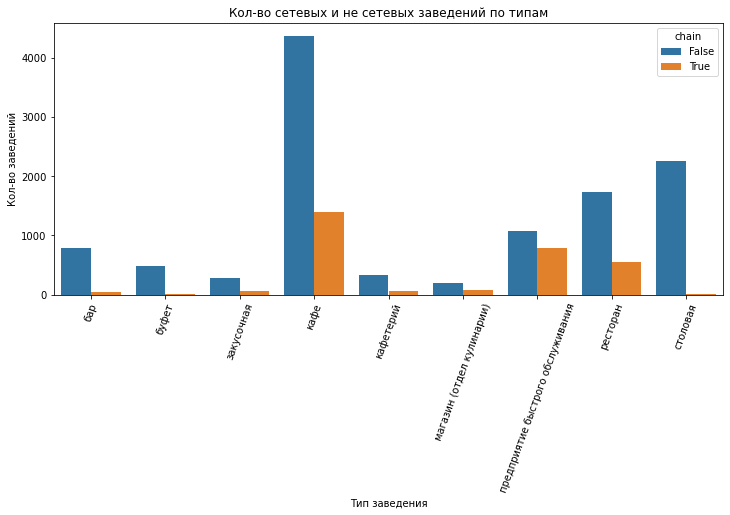

In [52]:
#Определим для какого вида объекта общественного питания характерно сетевое распространение?

chain_type = rest_data.groupby(['object_type','chain'],as_index=False).object_name.count()
plt.figure(figsize=(12,5))
ax=sns.barplot(data=chain_type,x='object_type',y='object_name',hue='chain')
ax.set_title('Кол-во сетевых и не сетевых заведений по типам')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Кол-во заведений')
plt.xticks(rotation=70)
plt.show()

In [53]:
# посмотрим на доли 
chain_sum = chain_type.groupby('object_type',as_index=False).object_name.sum()
chain_sum.columns = ['object_type','sum']
chain_type = chain_type.merge(chain_sum, on = 'object_type')
chain_type['ratio'] = chain_type['object_name']/chain_type['sum'] 


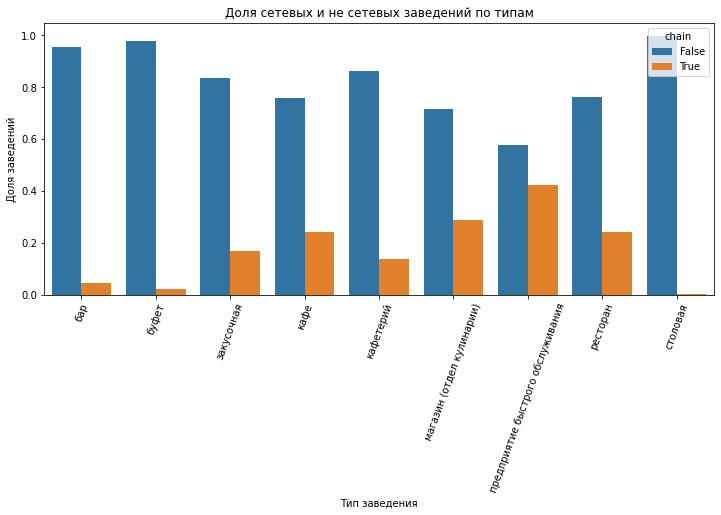

In [54]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=chain_type,x='object_type',y='ratio',hue='chain')
ax.set_title('Доля сетевых и не сетевых заведений по типам')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Доля заведений')
plt.xticks(rotation=70)
plt.show()

<b>Сетевой формат более характерен для предприятий быстрого обслуживания

95% процентиль кол-ва заведений: 30.25
95% процентиль средней вместимости: 153.93153390388414
медиана средней вместимости: 44.53703703703704


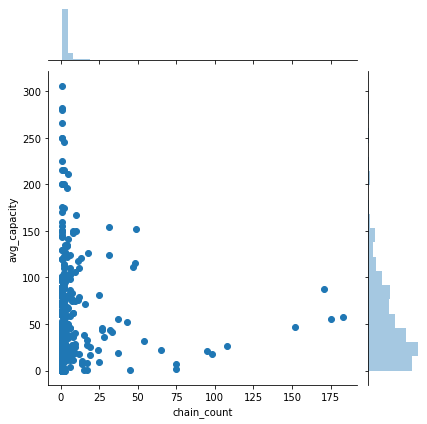

In [55]:
#Оценим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или
# мало заведений с большим количеством посадочных мест?
only_chain = rest_data.query('chain == True')
only_chain_grouped = only_chain.groupby('new_name').agg({'chain':'count','number':'mean'}).rename(columns={'chain':'chain_count','number':'avg_capacity'})

sns.jointplot(data = only_chain_grouped, x='chain_count',y='avg_capacity')

print('95% процентиль кол-ва заведений:', np.percentile(only_chain_grouped['chain_count'],95))
print('95% процентиль средней вместимости:', np.percentile(only_chain_grouped['avg_capacity'],95))
print('медиана средней вместимости:', only_chain_grouped['avg_capacity'].median())

In [56]:
# посмотрим как обстоят дела в общей выборке:
all_grouped = rest_data.groupby('new_name').agg({'chain':'count','number':'mean'})
print('95% процентиль:', np.percentile(all_grouped['number'],95))
print('среднее', all_grouped['number'].mean())
print('медиана:', all_grouped['number'].median())

95% процентиль: 240.0
среднее 66.82282436780115
медиана: 43.46153846153846


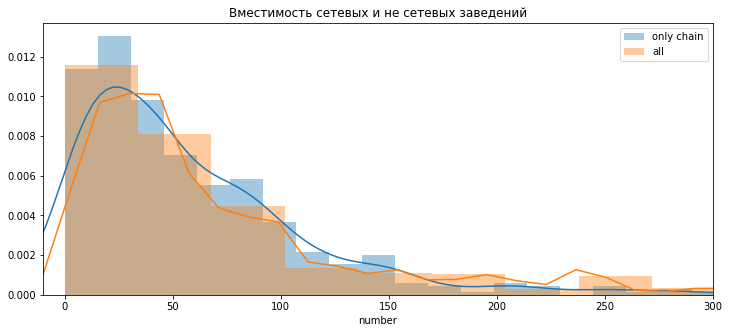

In [57]:
fig1, fig2 = plt.subplots(figsize=(12,5))
fig1 = sns.distplot(only_chain_grouped['avg_capacity'],label = 'only chain' )
fig2 = sns.distplot(all_grouped['number'],label = 'all' )
fig1, fig2 = plt.xlim(-10, 300)
plt.title("Вместимость сетевых и не сетевых заведений")
plt.legend()
plt.show()


<b>Похоже, что в 95% количество сетевых заведений не превышает 30, а кол-во посадочных мест 154. В целом количество посадочных мест в сетевых и не сетевых заведений схоже, но сетевых заведений с большим количеством мест всё же меньше.

In [58]:
#Для каждого вида объекта общественного питания определим среднее количество посадочных мест. 

In [59]:
cap_types = rest_data.groupby('object_type',as_index=False).number.mean().sort_values(by='number')

fig = px.bar(cap_types, x='object_type', y='number',title='Объекты общественного питания по средней вместимости')
fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig.show()

Лидирует столовая.

In [60]:
#Выделим в отдельный столбец информацию об улице из столбца address .
# воспользуемся регулярными выражениями
regex = "(^[-\w ]+шоссе|^проезд[-\w ]+|^[-\w ]+улица|[-\w ]+улица|улица[-\w ]+|[-\w ]+набережная|деревня[-\w ]+|\
[-\w ]+переулок|[-\w ]+тупик|[-\w ]+шоссе|[-\w ]+площадь|поселение[-\w ]+|площадь[-\w ]+|проспект[-\w ]+|[-\w ]+бульвар|\
[-\w ]+проезд|[-\w ]+проспект|бульвар[-\w ]+|город Зеленоград|[-\w ]+проезд|[-\w ]+аллея|шоссе[-\w ]+|\
аллея[-\w ]+|микрорайон[-\w ]+|переулок[-\w ]+|проезд[-\w ]+|[0-9]-й квартал[-\w ]+|[0-9]-й микрорайон?[-\w ]+),"
rest_data['new_address'] = rest_data['address'].str.extract(pat=regex)[0]


print('нераспознанных улиц:', rest_data['new_address'].isna().sum())

нераспознанных улиц: 93


In [61]:
#удалим нераспознанные строки <1%
rest_data.dropna(inplace=True)
rest_data.reset_index(drop=True,inplace=True)

#удалим лишние пробелы
rest_data['new_address'] = rest_data['new_address'].apply(lambda x: x.strip())
rest_data.sample(5)

,object_name,chain,address,number,object_type,new_name,new_address
14185,cofix,True,"город Москва, Ленинградское шоссе, дом 16А, ст...",0,кафетерий,cofix,Ленинградское шоссе
11132,суши wok,True,"город Москва, бульвар Дмитрия Донского, дом 1",0,предприятие быстрого обслуживания,суши wok,бульвар Дмитрия Донского
11053,чайхона баракат,False,"город Москва, Новодмитровская улица, дом 2, ко...",44,кафе,чайхона акат,Новодмитровская улица
1141,иссыкуль,False,"город Москва, Тихорецкий бульвар, дом 2, корпус 1",40,кафе,иссыкуль,Тихорецкий бульвар
7938,север-юг,False,"город Москва, Страстной бульвар, дом 2",60,ресторан,северюг,Страстной бульвар


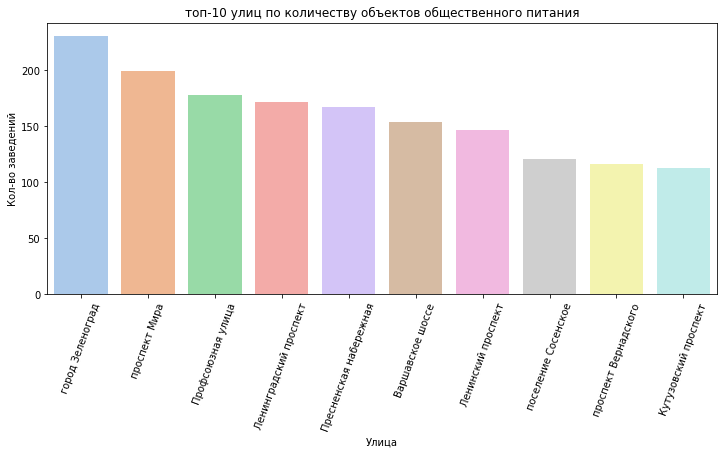

In [62]:
#Построим график топ-10 улиц по количеству объектов общественного питания. 
#Воспользуемся внешней информацией и определим в каких районах Москвы находятся эти улицы.

top_streets = rest_data.groupby('new_address', as_index=False).new_name.count().sort_values(by='new_name',ascending=False).head(10)


plt.figure(figsize=(12,5))
ax = sns.barplot(data=top_streets,x='new_address',y='new_name',palette="pastel")
ax.set_title('топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Улица')
ax.set_ylabel('Кол-во заведений')
plt.xticks(rotation=70)

plt.show()

In [63]:
#воспользуемся внешними данными (МОСГАЗ) по улицам и районам
districts = pd.read_csv('mosgaz-streets.csv')
#объединим с нашими улицами
top_streets = top_streets.merge(districts, left_on = 'new_address',right_on = 'streetname')[['new_address','new_name','area','okrug']]
new_top_streets = top_streets.groupby('new_address',as_index=False).agg({'new_name':'first','area':'first','okrug':'first'}).sort_values(by='new_name',ascending=False)
new_top_streets

,new_address,new_name,area,okrug
6,город Зеленоград,231,Район Крюково,Зеленоград
8,проспект Мира,199,Алексеевский район,СВАО
5,Профсоюзная улица,178,Академический район,ЮЗАО
2,Ленинградский проспект,172,Район Аэропорт,САО
4,Пресненская набережная,167,Пресненский район,ЦАО
0,Варшавское шоссе,154,Район Чертаново Центральное,ЮАО
3,Ленинский проспект,147,Район Проспект Вернадского,ЗАО
7,проспект Вернадского,116,Район Проспект Вернадского,ЗАО
1,Кутузовский проспект,113,Район Дорогомилово,ЗАО


похоже для Сосенского поселения района не нашлось

In [64]:
#Найдем число улиц с одним объектом общественного питания. 
bottom_streets = rest_data.groupby('new_address', as_index=False).new_name.count().query('new_name == 1')
bottom_streets = bottom_streets.merge(districts, left_on='new_address',right_on='streetname')

In [65]:
new_bottom_streets = bottom_streets.groupby('new_address',as_index=False).agg({'area':'first'})[['new_address','area']]
areas = new_bottom_streets.groupby('area',as_index=False).agg({'new_address':'count'})

print('ТОП 10 районов с одинокими улицами:')
areas.sort_values(by='new_address',ascending=False).head(10)

ТОП 10 районов с одинокими улицами:


,area,new_address
91,Таганский район,26
3,Басманный район,24
18,Пресненский район,21
76,Район Хамовники,21
92,Тверской район,20
19,Район Арбат,14
13,Мещанский район,12
43,Район Лефортово,12
30,Район Замоскворечье,11
85,Район Южное Бутово,10


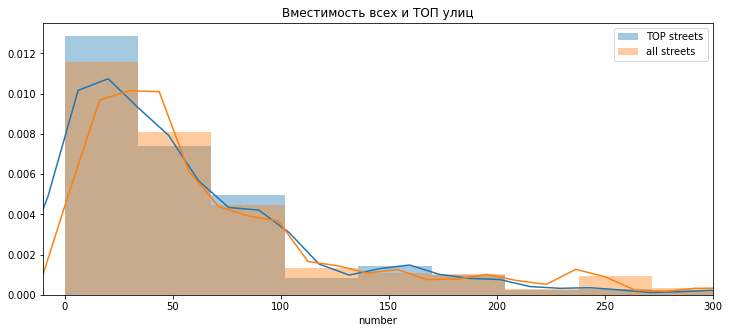

In [66]:
#Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

top_street_array = np.array(new_top_streets.reset_index()['new_address'])
top_streets_objects = rest_data.query('new_address in @top_street_array').reset_index()

fig1, fig2 = plt.subplots(figsize=(12,5))
fig1 = sns.distplot(top_streets_objects['number'],label = 'TOP streets')
fig2 = sns.distplot(all_grouped['number'],label = 'all streets' )
fig1, fig2 = plt.xlim(-10, 300)
plt.title("Вместимость всех и ТОП улиц")
plt.legend()
plt.show()

медиана среди ТОП улиц: 40.0


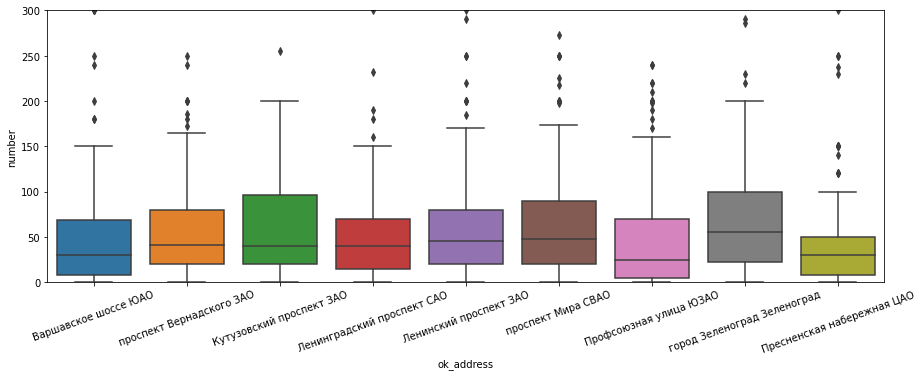

In [67]:
top_streets_objects = top_streets_objects.merge(new_top_streets, how='left', on = 'new_address')
top_streets_objects['ok_address'] =  top_streets_objects['new_address']+' '+top_streets_objects['okrug']

print('медиана среди ТОП улиц:', top_streets_objects['number'].median())

plt.figure(figsize=(15,5))
sns.boxplot(data = top_streets_objects,x='ok_address',y='number')
plt.xticks(rotation=20)
plt.ylim(0, 300)
plt.show()

Похоже, что на ТОП улицах обычно не много посадочных мест. Медианное значение 40, и в основном на каждой улице в половине заведений менее 100 мест. Вероятне всего, причина по которой эти улицы имеют большое кол-во заведений, это их протяженность и большое количество небольших заведений вдоль них.
Отдельно стоит выделить Пресненскую набережную рядом с Москва-Сити - единственная улица из ЦАО. Небольшое кол-во посадочных мест скорее всего из-за очень дорогой аренды, а разнообразие связано с большим количеством офисных работников в этом районе.

### Общий вывод:
Небольшое кафе - самый популярный вид заведения в Москве, при этом доля сетевх заведений в этом сегменте только 20%. Обыно вместимость кафе в районе 40 посадочных мест. Исходя из анализа расположений, возможно лучший вариант для нашего кафе будет Пресненская набережная - формат небольшого кафе знаком местным обитателям, большие инвестиции в кафе соответствуют статусу Москва-Сити, а роботы, наконец, смогут разнообразить жизнь местных клерков.

#### Шаг №3. Подготовка презентации
Презентация: <a href="https://docs.google.com/presentation/d/16FIZPmJt18wcGzLSOivT6vQmrk9qWOMlxQOBjJeZgQI/edit?usp=sharing">ссылка на облачное хранилище с презентацией</a>